In [98]:
%reload_ext autoreload
%autoreload 2
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

from src.config import *
from src.helper_visualization import *

stop = set(stopwords.words('english'))

df_processed = pd.read_excel(f'{DATA_FOLDER_PATH_PROCESSED}/data_processed.xlsx')

df_translated = pd.read_excel(f'{DATA_FOLDER_PATH_PROCESSED}/data_translated.xlsx')

if 'df_consolidated' not in locals():
    data_url = f'{DATA_FOLDER_PATH_PROCESSED}/data_consolidated.xlsx'
    df_consolidated = pd.read_excel(data_url)

    train_data_url = f'{DATA_FOLDER_PATH_PROCESSED}/data_train.xlsx'
    df_train = pd.read_excel(train_data_url)

    test_data_url = f'{DATA_FOLDER_PATH_PROCESSED}/data_test.xlsx'
    df_test = pd.read_excel(test_data_url)

# Helper functions

In [61]:

def create_corpus(df, col):
    corpus = []

    for x in tqdm.tqdm(df[col].str.split()):
        if x == x:
            for i in x:
                corpus.append(i)

    return corpus
def top_n_words(df, col, top_n=50):
    corpus = create_corpus(df, col)

    dic = defaultdict(int)
    for word in corpus:
        if word not in stop:
            dic[word] += 1
            
    top_n = top_n 
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:top_n]

    plt.rcParams['figure.figsize'] = (20, 30)
    plt.style.use('fivethirtyeight')
    x, y = zip(*top)
    plt.barh(x, y, color = 'blue')
    
    plt.title(f'Top {top_n} Words', fontsize = 20)
    # plt.xlabel('Words')
    plt.ylabel('Count')
    plt.xticks(rotation = 90, horizontalalignment = 'center')
    plt.show()

def plot_word_cloud(df, col):
    corpus = create_corpus(df, col)
    plt.figure(figsize=(16,12))
    word_cloud = WordCloud(
                            background_color='black',
                            max_font_size = 30
                            ).generate(" ".join(corpus[:200]))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

# Explore the data

100%|██████████| 115600/115600 [00:00<00:00, 3299814.49it/s]


<BarContainer object of 13 artists>

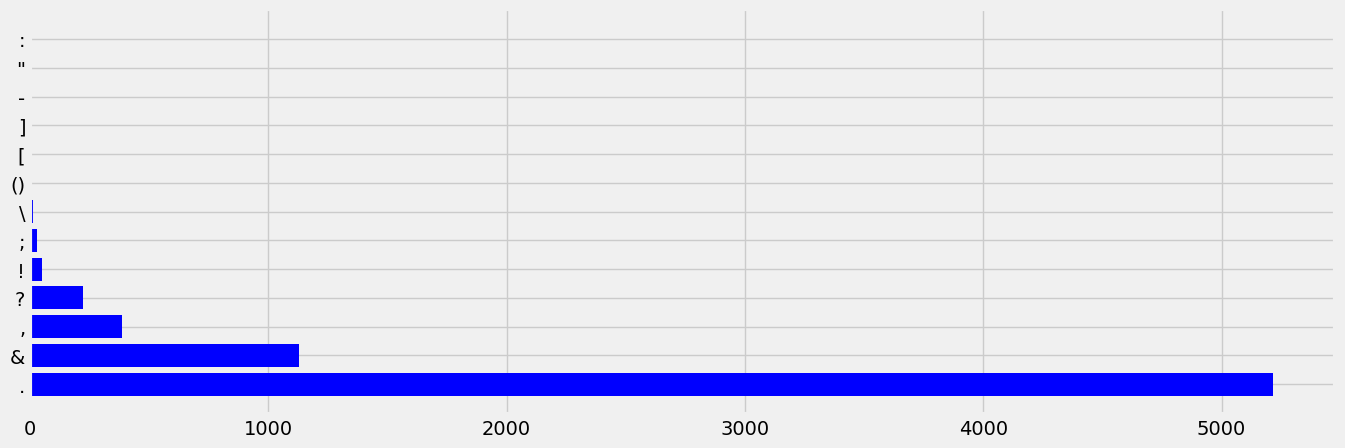

In [48]:
import string

corpus = create_corpus(df_consolidated, 'Title_Translated')
plt.figure(figsize=(15,5))

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x,y) vertical bar

100%|██████████| 115600/115600 [00:00<00:00, 3680219.38it/s]


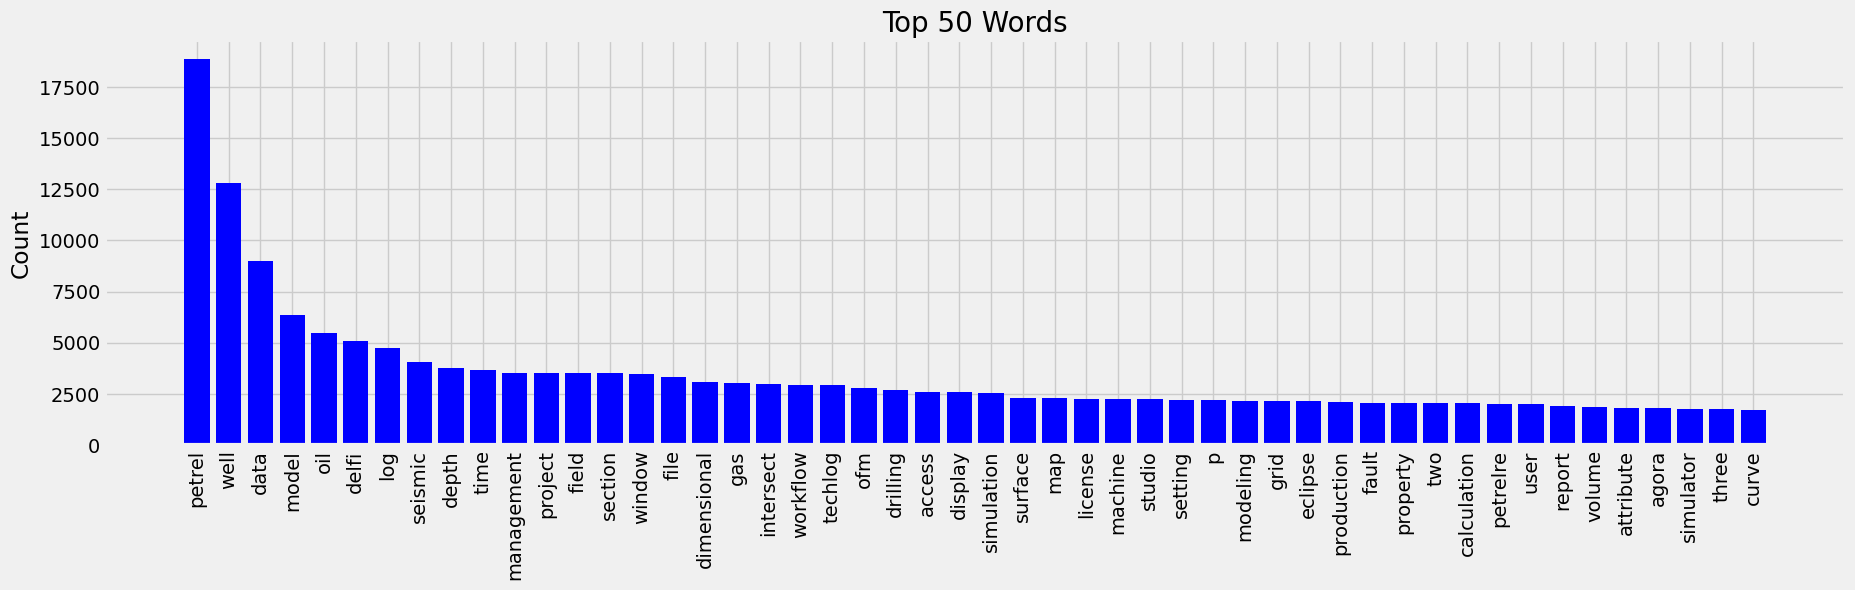

In [4]:
top_n_words(df_consolidated, 'Tags')

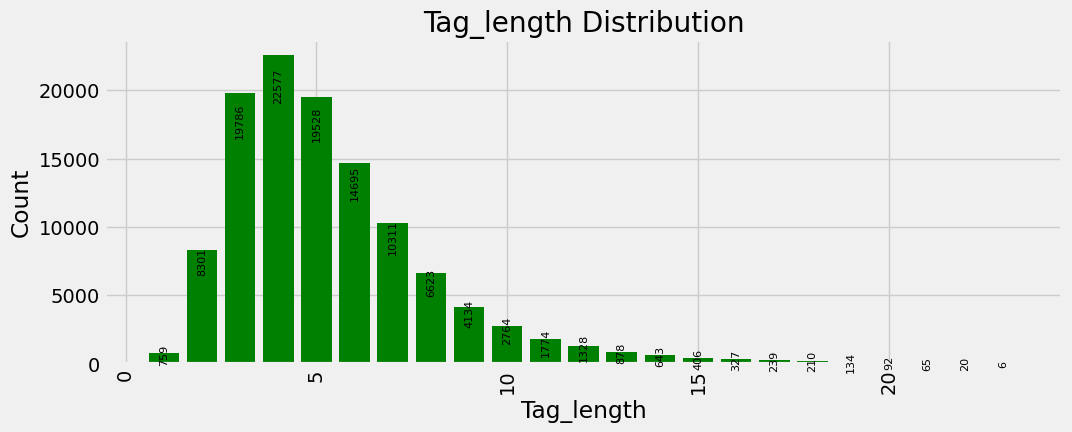

In [5]:
df_consolidated['Tag_length'] = df_consolidated['Tags'].apply(lambda x: len(x.split()))
hist_by_labels(df_consolidated, 'Tag_length', fig_height=4, log=False)

In [6]:
df_tag_length_1 = df_consolidated[df_consolidated['Tag_length'] == 1]
df_tag_length_2 = df_consolidated[df_consolidated['Tag_length'] == 2]
df_tag_length_3 = df_consolidated[df_consolidated['Tag_length'] == 3]
df_tag_length_4 = df_consolidated[df_consolidated['Tag_length'] == 4]
df_tag_length_5 = df_consolidated[df_consolidated['Tag_length'] == 5]
df_tag_length_6 = df_consolidated[df_consolidated['Tag_length'] == 6]
df_tag_length_7 = df_consolidated[df_consolidated['Tag_length'] == 7]
df_tag_length_8 = df_consolidated[df_consolidated['Tag_length'] == 8]
df_tag_length_9 = df_consolidated[df_consolidated['Tag_length'] == 9]
df_tag_length_10 = df_consolidated[df_consolidated['Tag_length'] == 10]
df_tag_length_11 = df_consolidated[df_consolidated['Tag_length'] >= 11]

100%|██████████| 120415/120415 [00:00<00:00, 2711381.23it/s]


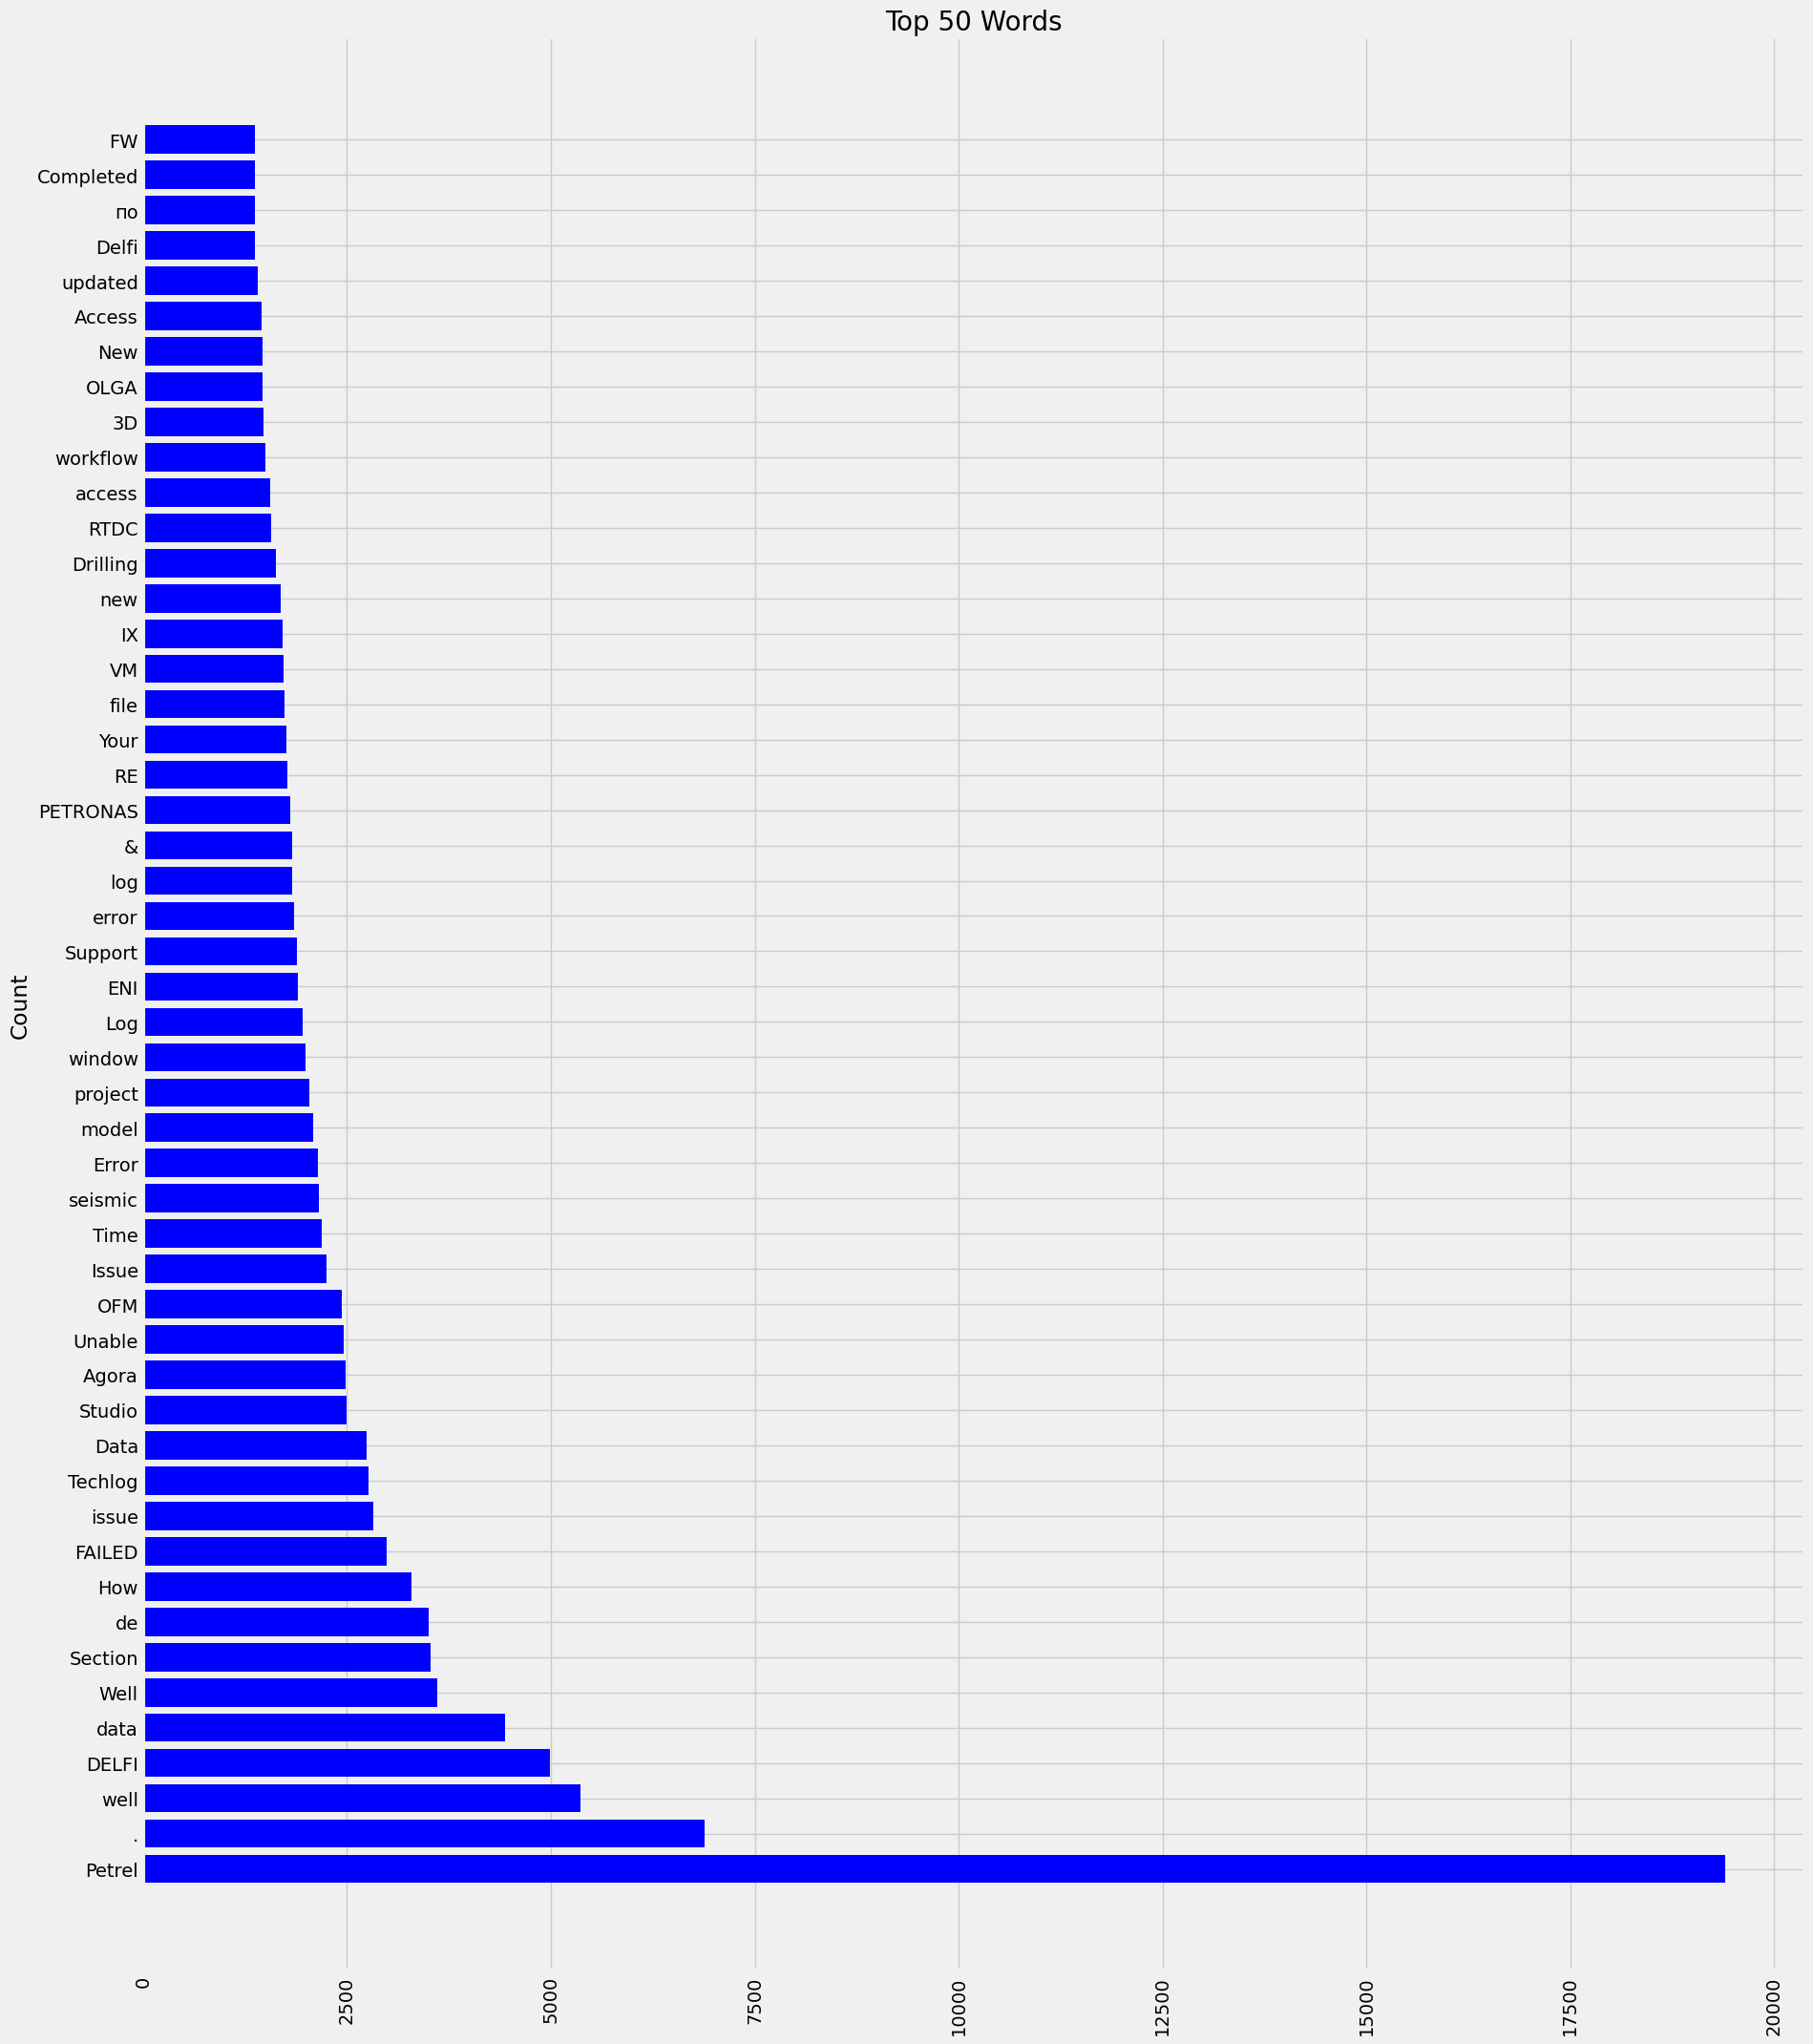

In [99]:
# show the words count in df_tag_length_2 'tags' columns
top_n_words(df_processed, 'Title_Processed')

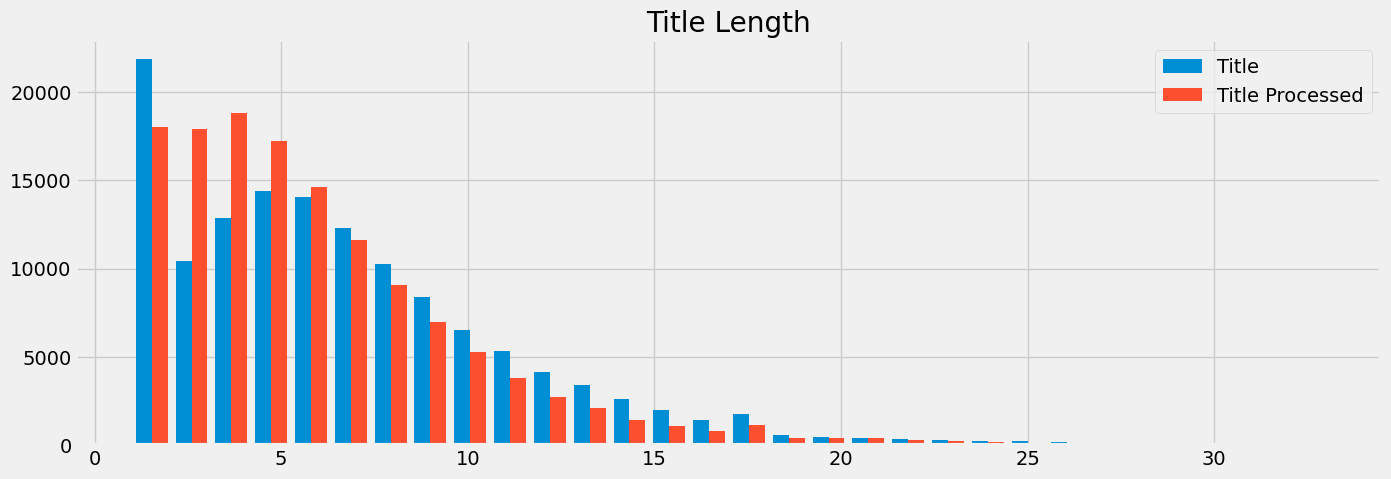

In [97]:
len_title = df_processed['Title'].apply(lambda x: len(x.split()))
len_title_processed = df_processed['Title_Processed'].apply(lambda x: len(x.split()))
# plot two histograms sidd by side in one plot
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.hist([len_title, len_title_processed], bins=30)
#set the bin width
axes.set_title('Title Length')
plt.legend(['Title', 'Title Processed'])
plt.show()

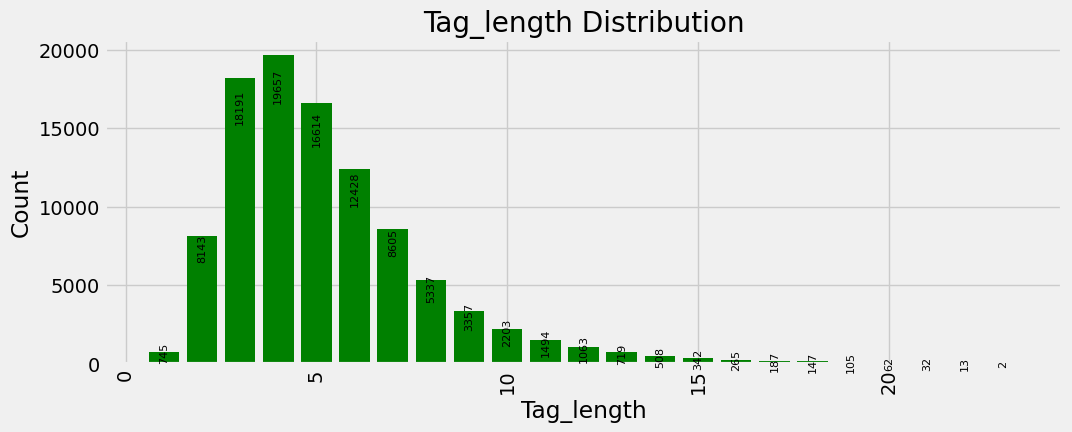

In [102]:
df_consolidated['Tag_length'] = df_consolidated['Tags'].apply(lambda x: len(x.split()))
hist_by_labels(df_consolidated, 'Tag_length', fig_height=4, log=False)

In [101]:
df_consolidated = pd.read_excel(data_url)
df_consolidated.describe().T

,count,mean,std,min,25%,50%,75%,max
Request ID,100219.0,1.233513e+06,651643.788027,80871.0,679777.0,1185034.0,1705768.0,2630708.0
Length,100219.0,5.431545e+00,2.974848,1.0,3.0,5.0,7.0,37.0
